In [142]:
import time
import tweepy
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import datetime
from collections import Counter
import random
from math import sqrt
from wordcloud import WordCloud,STOPWORDS
import pytz
import ExploratoryDataAnalysis as eda

%load_ext autoreload
%autoreload 2

In [2]:
consumer_key = 'dA43DArrQ3nV0l7iWOz993VMI'
consumer_secret = 'afx745bNRb3W0vqchR4Mtt4haid7i0Gi1gLS9vgTTZsuSpEl9z'
access_token = '771948456793477120-ZYkhquAETkTlr6Gt45EsDose3kWJwT5'
access_token_secret = 'BCSXX2Kf6nc3NPIsIWPRM2xPTD3ZAOXyQq93kVPzu3hSd'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# Sample Tweets

utc=pytz.UTC
num_tweets = 1_000_000_000
lang = 'en'
query = '#music'
print_progress = True
until = utc.localize(datetime.datetime.today())
since = until - datetime.timedelta(days=7)
print((until, since))
    
min_tweet_date = until
tweets = []
current_tweets_counter = 0
for tweet in tweepy.Cursor(api.search_tweets, q=query, geocode=f'37.6,-95.665,{sqrt((9_000_000)/3.14)}km', 
                           lang=lang, until=str(until).split(' ')[0]).items():        
    tweets.append(tweet)
    current_tweets_counter += 1
    # print(len(tweets), tweet.created_at, tweet.user.location)
    if current_tweets_counter % 1_000 == 0:
        print(f'Nuber of tweets: {len(tweets)}')
        print(f'Current date: {tweet.created_at}')
        with open(f'pickles/old_versions/{query[1:]}_tweets.pkl', 'wb') as f:
            pickle.dump(tweets, f)
    min_tweet_date = min(tweet.created_at,
                         min_tweet_date)
    if current_tweets_counter == num_tweets:
        break

In [131]:
query = '#health'
with open(f'pickles/old_versions/{query[1:]}_tweets.pkl', 'rb') as f:
    tweets = pickle.load(f)
    
print(len(tweets))

9000


In [132]:
df = eda.filter_tweets(tweets)
print(f'Number of rows: {df.shape[0]}')

Removed 3465 out of 9000 rows.


C:\Users\omerm\PycharmProjects\Semester8\CausalInference\CausalInferenceProject\ExploratoryDataAnalysis.py:40: RuntimeWarning: invalid value encountered in double_scalars
  df['scaled_favorite_count'] = df.apply(lambda row: (row['favorite_count'] - mu(row['user_id'])) / sigma(row['user_id']), axis = 1)


Number of rows: 4157


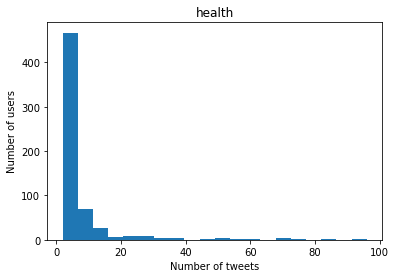

In [134]:
eda.plot_user_counts_distribution(df, title=query[1:])

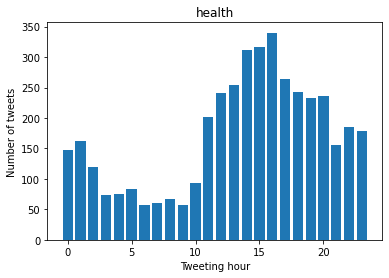

In [135]:
eda.plot_hours_distribution(df, title=query[1:])

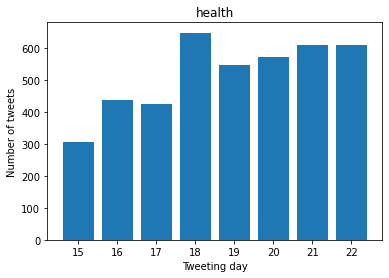

In [136]:
eda.plot_days_distribution(df, title=query[1:])

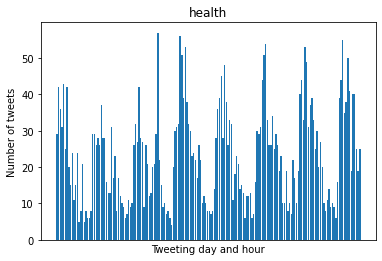

In [137]:
eda.plot_days_hours_distribution(df, title=query[1:])

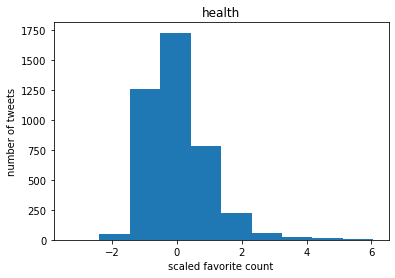

In [138]:
eda.plot_scaled_favorite_count(df, title=query[1:])

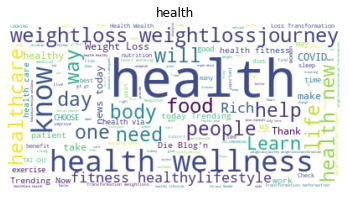

In [139]:
eda.wordcloud(df, title=query[1:])

In [140]:
df.to_pickle(f'pickles/{query[1:]}_tweets_filtered.pkl')

In [141]:
pd.read_pickle(f'pickles/{query[1:]}_tweets_filtered.pkl').shape

(4157, 76)